In [34]:
import nltk

In [33]:
colors = 'rgbcmyk'  # 多种颜色的组合，字符串形式
def bar_chart(categories, words, counts):
    import pylab
    ind = pylab.arange(len(words))
    width = 1 / (len(categories))
    bar_groups = []
    for c in range(len(categories)):
        bars = pylab.bar(ind + c * width, counts[categories[c]],
                        width, color=colors[c % len(colors)])
        bar_groups.append(bars)
    pylab.xticks(ind + width, words)
    pylab.legend([b[0] for b in bar_groups], categories, loc='upper left')
    pylab.ylabel('Frequency')
    pylab.title('Frequency of Six Modal Verbs by Genre')
    pylab.show()

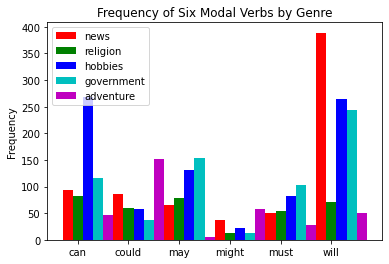

In [51]:
genres = ['news', 'religion', 'hobbies', 'government', 'adventure']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfdist = nltk.ConditionalFreqDist((genre, word)
                                  for genre in genres
                                  for word in nltk.corpus.brown.words(categories=genre)
                                  if word in modals)
counts = {}
for genre in genres:
    counts[genre] = [cfdist[genre][word] for word in modals]
    
bar_chart(genres, modals, counts)

# NetworkX

In [52]:
import networkx as nx
import matplotlib
from nltk.corpus import wordnet as wn

In [55]:
def traverse(graph, start, node):
    graph.depth[node.name] = node.shortest_path_distance(start)
    for child in node.hyponyms():
        graph.add_edge(node.name, child.name)
        traverse(graph, start, child)

def hyponym_graph(start):
    G = nx.Graph()
    G.depth = {}
    traverse(G, start, start)
    return G

def graph_draw(graph):
    nx.draw(graph,
            node_size=[16 * graph.degree(n) for n in graph],
            node_color=[graph.depth[n] for n in graph],
            with_labels= False)
    matplotlib.pyplot.show()

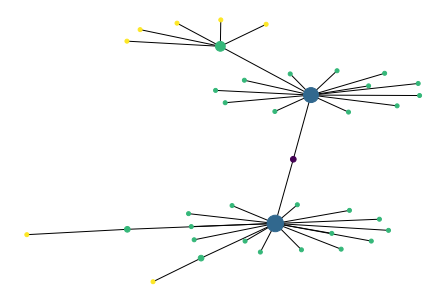

In [58]:
dog = wn.synset('cat.n.01')
graph = hyponym_graph(dog)
graph_draw(graph)

# 奇异值分解 

In [61]:
from numpy import linalg
from numpy import array

In [63]:
a = array([[4, 0], [3, -5]])
u, s, vt = linalg.svd(a)

In [64]:
u

array([[-0.4472136 , -0.89442719],
       [-0.89442719,  0.4472136 ]])

In [65]:
s

array([6.32455532, 3.16227766])

In [66]:
vt

array([[-0.70710678,  0.70710678],
       [-0.70710678, -0.70710678]])